<center><h1>1-ab: SIFT & BoW</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip

!wget https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/code/1-ab/tools.py

--2021-09-30 12:10:06--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip’

TP1-2-data.zip      100%[===================>]  82.44M  20.1MB/s    in 5.0s    

2021-09-30 12:10:11 (16.5 MB/s) - ‘TP1-2-data.zip’ saved [86446976/86446976]

Archive:  TP1-2-data.zip
   creating: data/
   creating: data/Scene/
   creating: data/Scene/PARoffice/
 extracting: data/Scene/PARoffice/image_0091.jpg  
 extracting: data/Scene/PARoffice/image_0167.jpg  
  inflating: data/Scene/PARoffice/image_0037.jpg  
 extracting: data/Scene/PARoffice/image_0135.jpg  
 extracting: data/Scene/PARoffice/image_0015.jpg  
 extracting: data/Scene/PARoffice/image_0182.jpg  
 extracting: data/Scene/PARoffice/image_0064.jpg  
 extracting: data/Scene/PARoffice/im

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Part 1 : SIFT

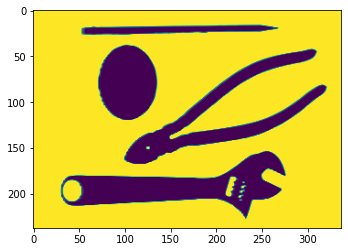

In [ ]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

In [ ]:
I.shape

(238, 337)

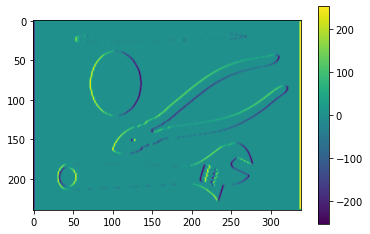

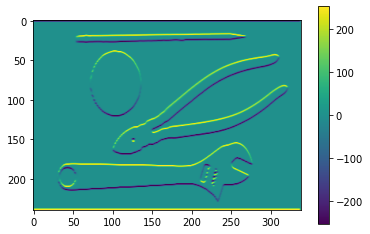

In [ ]:
from scipy import signal
def compute_grad(I):
    #####################
    ## Your code here  ##
    #####################
    
    ####################
    ##      END        #
    ####################
    Mx = 0.25 * np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
            ])
    My = 0.25 * np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]                        
            ])
    
    Ix = signal.convolve2d(I, Mx)
    Iy = signal.convolve2d(I, My)
    return Ix, Iy

# Example
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [ ]:
def compute_grad_mod_ori(I):
    #####################
    ## Your code here  ##
    #####################
    Ix,Iy = compute_grad(I)
    Gn= np.sqrt(Ix**2+Iy**2)
    Go=compute_grad_ori(Ix, Iy, Gn) 
     
    ####################
    ##      END        #
    ####################
    return Gn,Go

(240, 339)


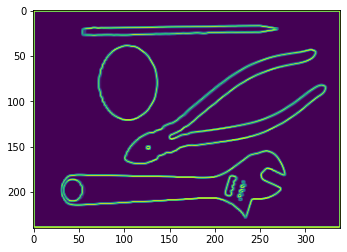

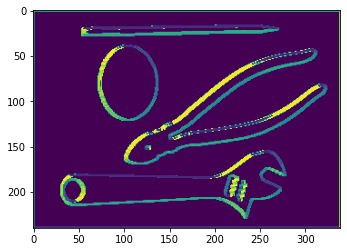

In [ ]:
Gn,Go = compute_grad_mod_ori(I)
print(Gn.shape)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [ ]:

def compute_histogram(gn, go):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))
    gn=gn.flatten()
    go=go.flatten()

    #####################
    ## Votre code ici  ##
    #####################
    for i in range (16):
        if go[i] != -1:
          hist[go[i]] += gn[i]

    ####################
    ##      FIN        #
    ####################
    return hist
  

In [ ]:
def compute_sift_region(Gn, Go, mask=None):
    t_min=.5
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift
    #3 le but de mask gaussien est donné plus d'importance au valeur de centre
    #4 reduire l'information et invariant a la rotation
    #5  le thresholding  la normalisation pour etre invariant à lumunosité

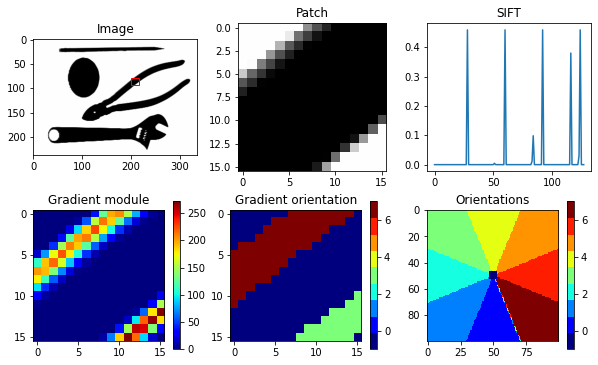

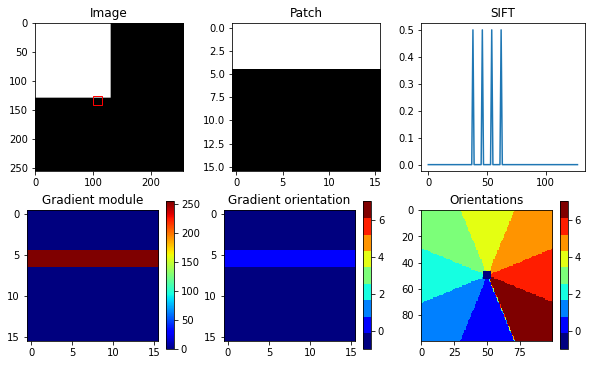

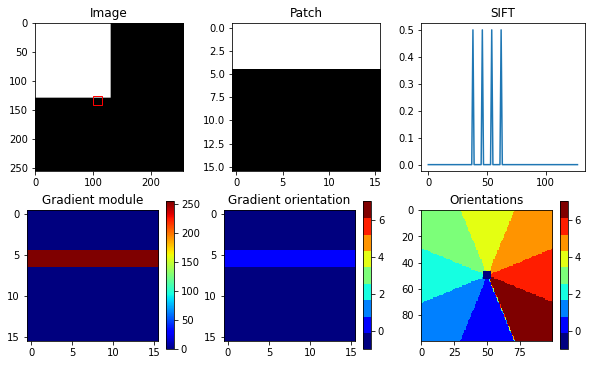

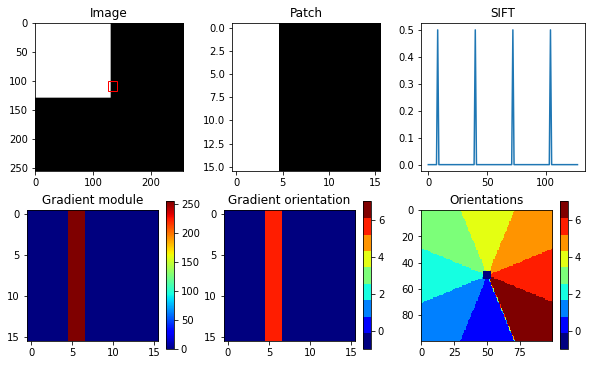

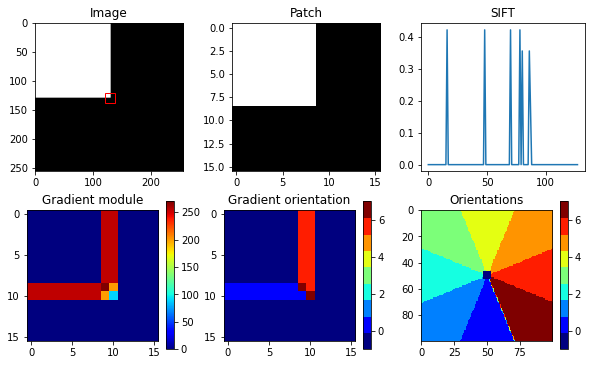

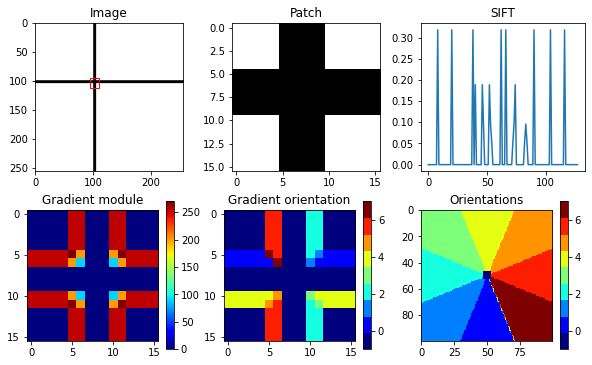

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.18864812, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.18864812, 0.09560369, 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864

In [ ]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [ ]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
    
    #####################
    ## Your code here  ##
    #####################
    # Here, compute on the global image (norm, gradients)
    Gn, Go = compute_grad_mod_ori(im)

    ####################
    ##      END        #
    ####################

    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Your code here  ##
            #####################
            k=16
            print(xi,yj)
            sifts[i, j, :] = compute_sift_region(Gn[xi:xi+k,yj:yj+k], Go[xi:xi+k,yj:yj+k],m)# TODO SIFT of the patch of coords (xi, yj)

            ####################
            ##      END        #
            ####################

    return sifts

# Compute SIFT

The computation can take several minutes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
48 144
48 152
48 160
48 168
48 176
48 184
48 192
48 200
48 208
48 216
48 224
48 232
48 240
48 248
48 256
48 264
48 272
48 280
48 288
56 0
56 8
56 16
56 24
56 32
56 40
56 48
56 56
56 64
56 72
56 80
56 88
56 96
56 104
56 112
56 120
56 128
56 136
56 144
56 152
56 160
56 168
56 176
56 184
56 192
56 200
56 208
56 216
56 224
56 232
56 240
56 248
56 256
56 264
56 272
56 280
56 288
64 0
64 8
64 16
64 24
64 32
64 40
64 48
64 56
64 64
64 72
64 80
64 88
64 96
64 104
64 112
64 120
64 128
64 136
64 144
64 152
64 160
64 168
64 176
64 184
64 192
64 200
64 208
64 216
64 224
64 232
64 240
64 248
64 256
64 264
64 272
64 280
64 288
72 0
72 8
72 16
72 24
72 32
72 40
72 48
72 56
72 64
72 72
72 80
72 88
72 96
72 104
72 112
72 120
72 128
72 136
72 144
72 152
72 160
72 168
72 176
72 184
72 192
72 200
72 208
72 216
72 224
72 232
72 240
72 248
72 256
72 264
72 272
72 280
72 288
80 0
80 8
80 16
80 24
80 32
80 40
80 48
80 56
80 64
80 72

# Part 2 : Visual dictionnary

In [ ]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [ ]:
# Code here the `compute_visual_dict` function

def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    
    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Your code here  ##
    #####################

    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sift)
    centers=kmeans.cluster_centers_
    vdict =np.concatenate((centers,np.zeros(1,128)))
    
    ####################
    ##      END        #
    ####################
    return np.zeros((1001,128))


In [ ]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict


ValueError: ignored

In [ ]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
# display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

centers = list(range(20))
for center in centers:
  center_vect = vdict[center]
  dist = ((sifts - center_vect)**2).sum(axis=1)
  # get best 100
  top100 = dist.argsort()[:100]
  top100_regions = regions[top100]
  display_images(top100_regions) # Show 100 random regions

# Partie 3 : BoW

In [ ]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    ##################### 
    ## Your code here  ##
    #####################
    # compute distance from image sifts to vdict

  
    ####################
    ##      END        #
    ####################
    return feats

In [ ]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here